# 5   Logistic regression

## 5.2   Using optimization to find the best regression coefficients

### 5.2.2   Train: using gradient ascent to find the best parameters

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

***Listing 5.1*   Logistic regression gradient ascent optimization functions: `loadDataSet()` & `sigmoid()` & `gradAscent()`**

In [4]:
from numpy import *

In [2]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch05/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [3]:
def sigmoid(inX):
    return 1.0 / (1 + exp(-inX))

In [5]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()   # Convert to NumPy matrix data type
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error   # Matrix multiplication
    return weights

In [6]:
dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 5.2.3   Analyze: plotting the decision boundary

***List 5.2*   Plotting the logistic regression best-fit line and dataset: `plotBestFit()`**

In [29]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    weights = wei.getA()
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = arange(-3.0, 3.0, 0.1)
    y = (- weights[0] - weights[1] * x) / weights[2]   # Best-fit line
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

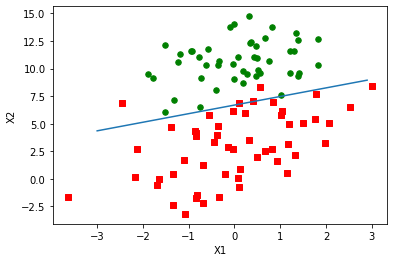

In [22]:
plotBestFit(gradAscent(dataArr, labelMat))

### 5.2.4   Train: stochastic gradient ascent

***Listing 5.3*   Stochastic gradient ascent: `stocGradAscent0()`**

In [12]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

`stocGradAscent0()` is similar with `gradAscent()` except that the variable `h` and `error` are single values rather than vectors. All of the variables are NumPy arrays.

In [31]:
def plotBestFit(weights, stoc = True):   # This function is slightly modified to avoid input-type problems
    import matplotlib.pyplot as plt
    if stoc == False:
        weights = weights.getA()
    # While applying gradient ascent, the input of weights is a matrix
    # While applying stochastic gradient ascent, the input of weights is an array
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = arange(-3.0, 3.0, 0.1)
    y = (- weights[0] - weights[1] * x) / weights[2]   # Best-fit line
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

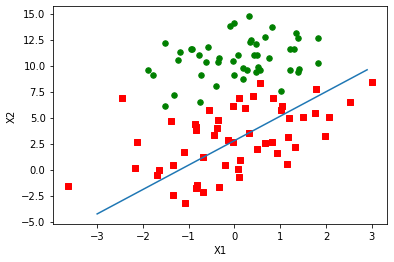

In [32]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(weights)

***Listing 5.4*   Modified stochastic gradient ascent: `stocGradAscent1()`**

In [34]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01   # Alpha changes with each iteration
            randIndex = int(random.uniform(0, len(dataIndex)))   # Update vectors are randomly selected
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

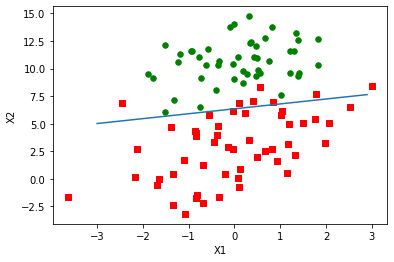

In [35]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights)

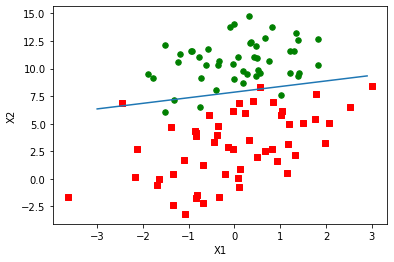

In [36]:
weights = stocGradAscent1(array(dataArr), labelMat, 500)
plotBestFit(weights)

## 5.3   Example: estimating horse fatalities from colic

***Listing 5.5*   Logistic regression classification function: `classifyVector()` & `colicTest()` & `multiTest()`**

In [37]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [41]:
def colicTest():
    frTrain = open('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch05/horseColicTraining.txt')
    frTest = open('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch05/horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = float(errorCount) / numTestVec
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

In [42]:
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum / float(numTests)))

In [43]:
multiTest()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


the error rate of this test is: 0.373134
the error rate of this test is: 0.358209
the error rate of this test is: 0.388060
the error rate of this test is: 0.313433
the error rate of this test is: 0.343284
the error rate of this test is: 0.343284
the error rate of this test is: 0.477612
the error rate of this test is: 0.358209
the error rate of this test is: 0.402985
the error rate of this test is: 0.313433
after 10 iterations the average error rate is: 0.367164
